# _Bibliotecas e Limpeza dos Dados_

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv(r"C:\pokemon_datasets\Pokedex_Ver_SV2.csv", sep = ';')
data = data.drop_duplicates('No', keep='first') # Eliminar as versões diferentes do mesmo pokemon, como as Megaevoluções

data  = data.fillna(value='Monotype') # Alguns Pokémon,  possuem apenas uma tipagem, nesse dataframe, esses Pokémon não possuem 
                                  # valor (NaN), o que pode atrapalhar a visualização dos dados, portanto, essa função adiciona
                                  #'Monotype' para a tipagem secundária, sinalizando que o Pokémon é tipo único.
data = data[['No', 'Name', 'Type1', 'Type2', 'Gen', 'HP', 'Attack', 'Defense', 'SP_Attack', 'SP_Defense', 'Speed', 'Total']]
data

,No,Name,Type1,Type2,Gen,HP,Attack,Defense,SP_Attack,SP_Defense,Speed,Total
0,1,Bulbasaur,Grass,Poison,1,45,49,49,65,65,45,318
1,2,Ivysaur,Grass,Poison,1,60,62,63,80,80,60,405
2,3,Venusaur,Grass,Poison,1,80,82,83,100,100,80,525
4,4,Charmander,Fire,Monotype,1,39,52,43,60,50,65,309
5,5,Charmeleon,Fire,Monotype,1,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1026,Iron Crown,Steel,Psychic,9,90,72,100,122,108,98,590
1222,1027,Terapagos Normal Form,Normal,Monotype,9,90,65,85,65,85,60,450
1223,1028,Terapagos Terastal Form,Normal,Monotype,9,95,95,110,105,110,85,600
1224,1029,Terapagos Stellar Form,Normal,Monotype,9,160,105,110,130,110,85,700


# _Medidas de centralidade_

Definindo duas funções, uma para percorrer os stats, utilizar a função da medida como parâmetro e imprimir os resultados. Outra  para fazer uma contagem de quantos Pokémon existem para cada geração, utilizar a função como parâmetro e imprimir os resultados.

In [3]:
def Percorrer_stats(Func):
    stats = ('HP', 'Ataque', 'Defesa', 'Ataque Especial', 'Defesa Especial', 'Velocidade', 'Total')
    stats_parametro = ('HP', 'Attack', 'Defense', 'SP_Attack', 'SP_Defense', 'Speed', 'Total')
    
    for i in range (7):
        medida = Func(data, stats_parametro[i])
        print(f"{stats[i]} = {medida:.2f}\n")
    
def Pokemon_gen(Func, medida_string):
    contagem = data['Gen'].value_counts()
    medida = Func(data.groupby('Gen').size())

    print(f"{medida_string} de Pokémon por Geração: {medida:.2f}")

# Média

In [4]:
def Media (data, stat):
    return np.mean(data[stat])

def Media_gen(contagem):
    return np.mean(contagem)

## Estatísticas

In [5]:
Percorrer_stats(Media)

HP = 70.32

Ataque = 77.68

Defesa = 72.61

Ataque Especial = 70.14

Defesa Especial = 70.36

Velocidade = 67.35

Total = 428.47



## Pokémon / Geração

In [6]:
Pokemon_gen(Media_gen, 'Média')

Média de Pokémon por Geração: 114.44


# Mediana

In [7]:
def Mediana (data, stat):
    return np.median(data[stat])

def Mediana_gen(contagem):
    return np.median(contagem)

## Estatísticas

In [8]:
Percorrer_stats(Mediana)

HP = 68.00

Ataque = 75.00

Defesa = 70.00

Ataque Especial = 65.00

Defesa Especial = 67.00

Velocidade = 65.00

Total = 452.00



## Pokémon / Geração

In [9]:
Pokemon_gen(Mediana_gen, 'Mediana')

Mediana de Pokémon por Geração: 107.00


# Moda

In [10]:
def Moda (data, stat):
    return data[stat].mode()[0]

def Moda_gen (contagem):
    return contagem.mode()[0]

## Estatísticas

In [11]:
Percorrer_stats(Moda)

HP = 60.00

Ataque = 80.00

Defesa = 60.00

Ataque Especial = 40.00

Defesa Especial = 50.00

Velocidade = 50.00

Total = 600.00



## Pokémon / Geração

In [12]:
Pokemon_gen(Moda_gen, 'Moda')

Moda de Pokémon por Geração: 72.00


# _Medidas de dispersão_

## Variância

In [13]:
def Var (data, stat):
    return np.var(data[stat])

def Var_gen (contagem):
    return np.var(contagem)

## Estatísticas

In [14]:
Percorrer_stats(Var)

HP = 713.77

Ataque = 887.56

Defesa = 855.83

Ataque Especial = 879.46

Defesa Especial = 710.53

Velocidade = 825.80

Total = 12786.93



## Pokémon / Geração

In [15]:
Pokemon_gen(Var_gen, 'Variância')

Variância de Pokémon por Geração: 750.47


## Desvio padrão

In [16]:
def Dp (data, stat):
    return np.std(data[stat])

def Dp_gen (contagem):
    return np.std(contagem)

## Estatísticas

In [17]:
Percorrer_stats(Dp)

HP = 26.72

Ataque = 29.79

Defesa = 29.25

Ataque Especial = 29.66

Defesa Especial = 26.66

Velocidade = 28.74

Total = 113.08



## Pokémon / Gen

In [18]:
Pokemon_gen(Dp_gen, 'Desvio padrão')

Desvio padrão de Pokémon por Geração: 27.39


# _Boxplots_

Definindo a função para se criar os gráficos:

In [19]:
def Boxplot (data, stat):
    plt.figure(figsize=(5,2))
    sns.boxplot(x=data[stat])
    plt.title(stat)
    plt.xlabel('Valor dos stats')
    plt.ylabel(' ')
    plt.show()    

## Para HP:

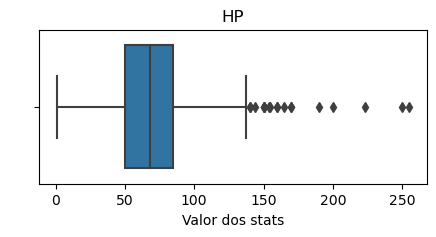

In [20]:
Boxplot (data, 'HP')

## Para Ataque:

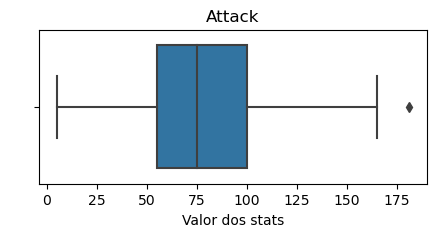

In [21]:
Boxplot(data, 'Attack')

## Para Defesa:

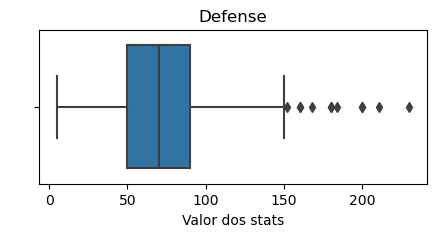

In [22]:
Boxplot(data, 'Defense')

## Para Ataque Especial:

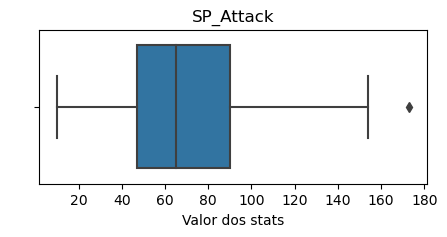

In [23]:
Boxplot(data, 'SP_Attack')

## Para Defesa especial:

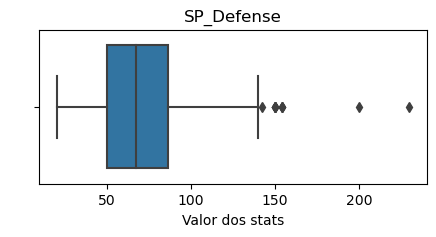

In [24]:
Boxplot(data, 'SP_Defense')

## Para Velocidade:

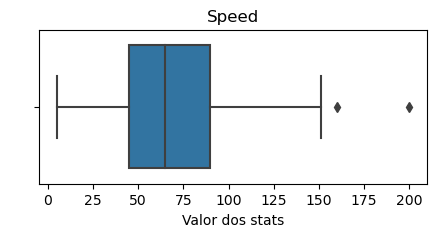

In [25]:
Boxplot(data, 'Speed')

## Para a soma total dos stats:

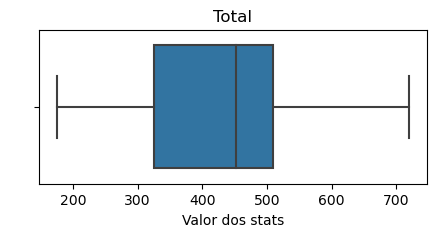

In [26]:
Boxplot(data, 'Total')

# Boxplot de Pokémon / Geração

Text(0, 0.5, 'Número da Pokedéx')

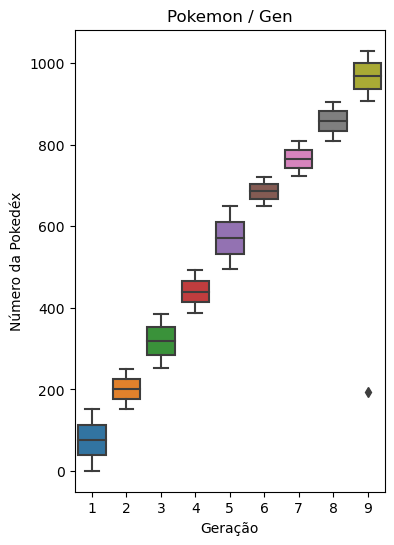

In [27]:
plt.figure(figsize=(4,6))

sns.boxplot(x=data['Gen'], y = data['No'])

plt.title('Pokemon / Gen')
plt.xlabel('Geração')
plt.ylabel('Número da Pokedéx')


# Boxplot baseado nos stats totais, diferenciado em Tipo principal

<Axes: xlabel='Type1', ylabel='Total'>

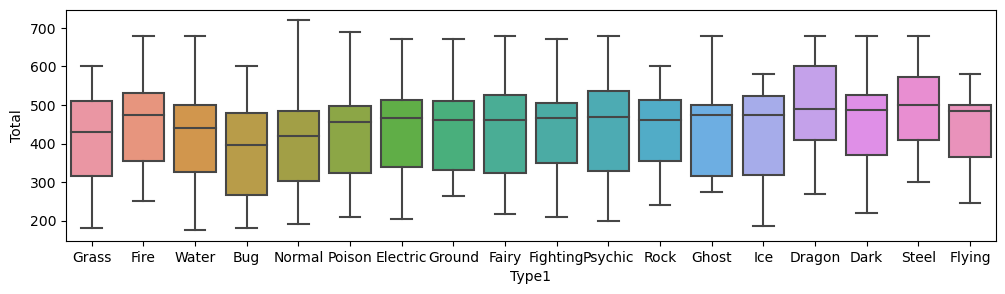

In [28]:
plt.figure(figsize=(12, 3))
sns.boxplot(data = data, x = 'Type1', y = 'Total')

# _Demonstração de gráficos_


Primeiro, vamos desenvolver uma função que conte os valores únicos em uma coluna específica do dataframe, calcule sua média e, em seguida, gere um gráfico de barras com essas informações, esse gráfico será útil para informar o número de Pokémon em um parâmetro escolhido, tal como geração ou tipo.

In [29]:
def Barplot(data, column, size_x, size_y, eixo_x, eixo_y, title):
    
    contagem = data[column].value_counts() # Conta a quantidade de Pokémon em cada grupo formado.
    media = np.mean(data.groupby(column).size()) # Calcula a média dos Pokémon dos grupos formados.
   
    plt.figure(figsize=(size_x, size_y)) # Define o tamanho do gráfico.
    sns.barplot(x=contagem.index, y=contagem.values, palette="bright") # Gera  o gráfico com as informações obtidas.
    
    plt.xlabel(eixo_x) # Define o nome do eixo X.
    plt.ylabel(eixo_y) # Define o nome do eixo Y.
    plt.title(title)   # Define o título do gráfico.
    
    plt.axhline(media, color='r', linestyle='--', linewidth=2) # Gera a linha da média obtida anteriormente no gráfico.

## Quantidade de Pokémon por Geração

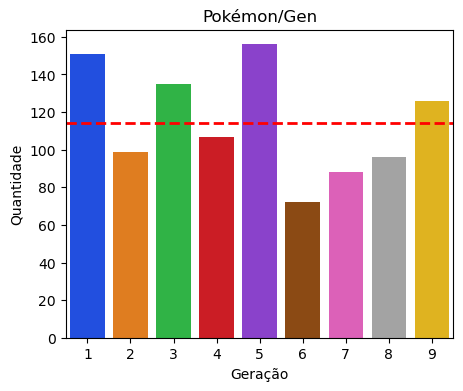

In [30]:
Barplot(data, 'Gen', 5,  4, 'Geração', 'Quantidade', 'Pokémon/Gen')

## Quantidade de pokémon por tipo principal

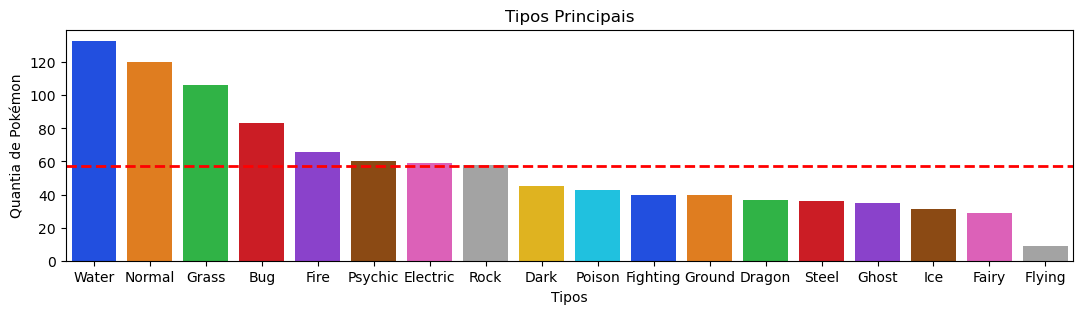

In [31]:
Barplot(data, 'Type1', 13, 3, 'Tipos', 'Quantia de Pokémon', 'Tipos Principais')

## Quantidade de Pokémon por tipo secundário

É notório que a maioria dos Pokémon são de um único tipo, ou seja, não possuem um tipo secundário, que é identificado pelo valor "Monotype".

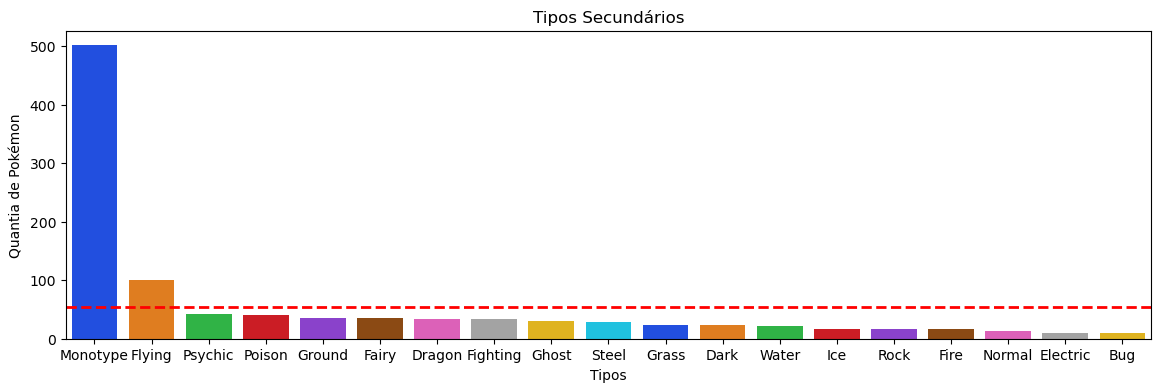

In [32]:
Barplot(data, 'Type2', 14, 4, 'Tipos', 'Quantia de Pokémon', 'Tipos Secundários')

## Apenas Pokémon que possui tipo secundário

Sendo assim, vamos verificar apenas os Pokémon que possuem tipo secundário:

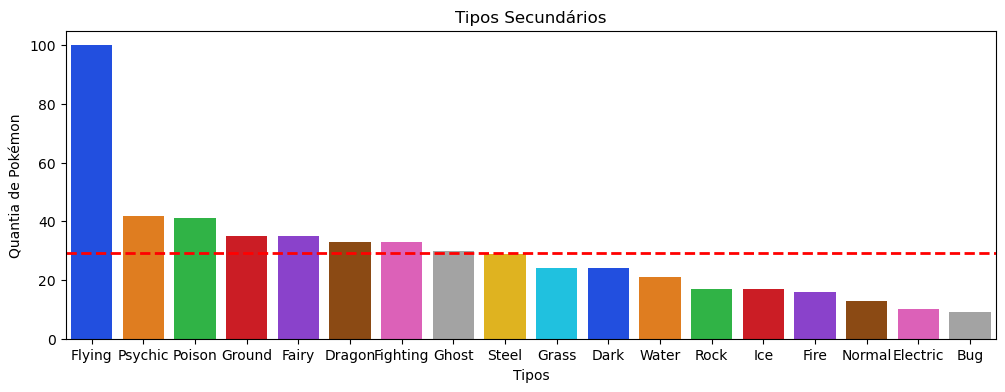

In [33]:
double_type = data[data['Type2'] != 'Monotype']
Barplot(double_type, 'Type2', 12, 4, 'Tipos', 'Quantia de Pokémon', 'Tipos Secundários')

## A tipagem dos Pokémon

Agora, vamos verificar quais são os pareamentos desses Pokémon utilizando um gráfico em heatmap:

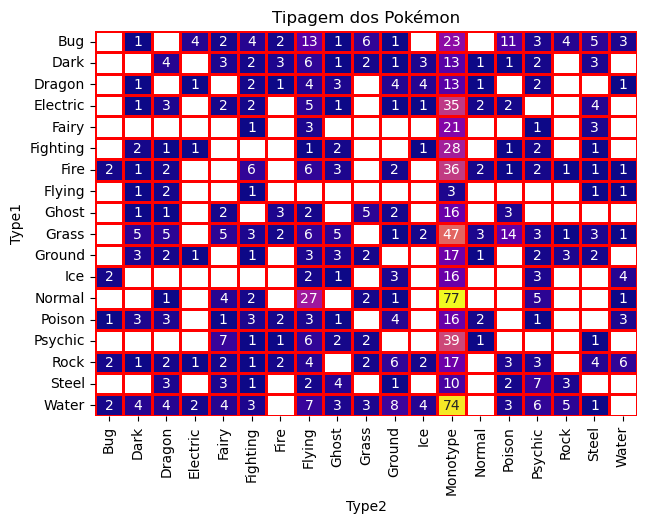

In [34]:
data_double_type = data.groupby(['Type1', 'Type2'])

plt.figure(figsize=(7, 5))
sns.heatmap(data_double_type.size().unstack(), cmap='plasma', linewidths=1, cbar=False, linecolor='red', annot=True)
plt.title('Tipagem dos Pokémon')
plt.show()

Note que esse gráfico confirma a clara preferência da empresa desenvolvedora para criar pokémon que possui apenas um tipo, sendo o tipo "Normal" o mais frequente.

# Ranking de força

## Top 10 mais fortes baseado na soma de seus stats

In [35]:
data_top = data.sort_values(by='Total', ascending=False)
data_top = data_top.iloc[:10]
print(f"{data_top[['Name', 'Total']]}")

                        Name  Total
606                   Arceus    720
1224  Terapagos Stellar Form    700
1069               Eternatus    690
594                   Palkia    680
962                   Lunala    680
961                 Solgaleo    680
779                   Zekrom    680
778                 Reshiram    680
869                  Yveltal    680
198                   Mewtwo    680


Note que grande parte dos Pokémon possuem valores iguais de stats totais.

Portanto, para resolver o problema das estatísticas iguais, podemos utilizar um z-score para calcular os Pokémon que possuem os stats mais consistentes, estatisticamente.

Para isso vamos criar uma função que calcule o z-score:

In [36]:
def Z_score(stats, media, dp):
    return (stats - media) / dp

E agora vamos adicionar uma nova coluna "z-score" no dataframe utilizado e vamos armazenar o próprio dataframe com o valor obtido em uma outra variável:

In [37]:
data['z-score'] = data['Total'].apply(lambda x: Z_score(x, Media(data, 'Total'), Dp(data, 'Total')))

In [38]:
data_zscore = data.sort_values(by = 'z-score', ascending = False)

In [39]:
data_zscore.iloc[:10]

,No,Name,Type1,Type2,Gen,HP,Attack,Defense,SP_Attack,SP_Defense,Speed,Total,z-score
606,493,Arceus,Normal,Monotype,4,120,120,120,120,120,120,720,2.578060
1224,1029,Terapagos Stellar Form,Normal,Monotype,9,160,105,110,130,110,85,700,2.401193
1069,890,Eternatus,Poison,Dragon,8,140,85,95,145,95,130,690,2.312759
594,484,Palkia,Water,Dragon,4,90,120,100,150,120,100,680,2.224326
962,792,Lunala,Psychic,Ghost,7,137,113,89,137,107,97,680,2.224326
961,791,Solgaleo,Psychic,Steel,7,137,137,107,113,89,97,680,2.224326
779,644,Zekrom,Dragon,Electric,5,100,150,120,120,100,90,680,2.224326
778,643,Reshiram,Dragon,Fire,5,100,120,100,150,120,90,680,2.224326
869,717,Yveltal,Dark,Flying,6,126,131,95,131,98,99,680,2.224326
198,150,Mewtwo,Psychic,Monotype,1,106,110,90,154,90,130,680,2.224326


Como podemos observar, não mudou nossa situação, pois foi obtido o z-score de números iguais dependendo do mesmo desvio padrão e média. Mas e se obtivermos o z-score de cada uma das estatísticas e somarmos cada uma delas?

In [40]:
stats = ('HP', 'Attack', 'Defense', 'SP_Attack', 'SP_Defense', 'Speed')

for i in stats:
    data_zscore[i] = (data_zscore[i]).apply(lambda x: Z_score(x, Media(data, i), Dp(data, i)))
    
data_p = data_zscore[['HP', 'Attack', 'Defense', 'SP_Attack', 'SP_Defense', 'Speed']]
soma_linhas = data_p.sum(axis=1)

data_zscore.loc[:, 'z-score'] = soma_linhas

data_zscore = data_zscore.sort_values(by = 'z-score', ascending = False)

Agora sim, obtivemos resultados positivos, adquirimos um ranking dos pokémon mais fortes e consistentes em seus stats.

                        Name    z-score
606                   Arceus  10.275141
1224  Terapagos Stellar Form   9.671124
1069               Eternatus   9.247472
598                 Giratina   9.008353
311                    Lugia   9.001885
312                    Ho-Oh   8.955663
962                   Lunala   8.902007
961                 Solgaleo   8.838317
869                  Yveltal   8.829200
868                  Xerneas   8.829200


Text(0.5, 1.0, 'Top  10')

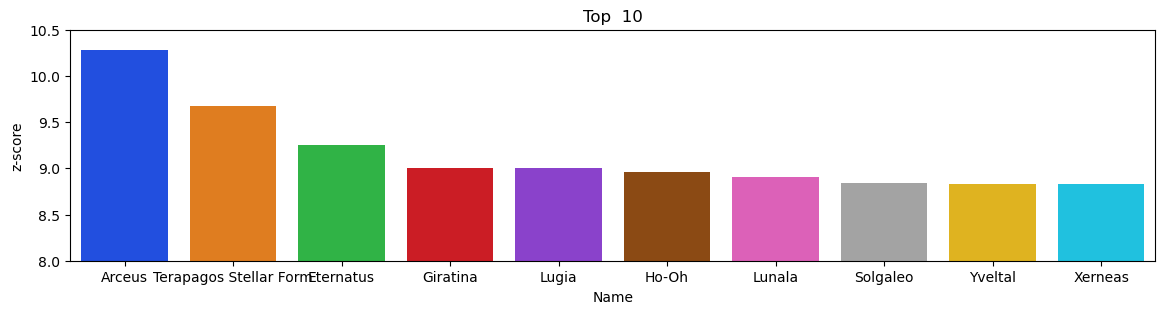

In [41]:
data_zscore_top10 = data_zscore.iloc[:10]
data_zscore_top10
print(f"{data_zscore_top10[['Name', 'z-score']]}")
plt.figure(figsize=(14, 3))
plt.ylim(8, 10.5)
sns.barplot(data = data_zscore_top10, x  = 'Name', y = 'z-score', palette = 'bright')
plt.title('Top  10')

## Correlação Tipo Primário / Stats

Primeiro, como de praste, vamos criar uma função capaz de adquirir a média nos stats de cada tipo de pokémon e então criar um gráfico de dispersão para avaliar os tipos acima ou abaixo da média geral.

In [42]:
def TopTipos (data, stats):
    
    media_stats_por_tipo = data.groupby('Type1')[stats].mean().reset_index() # Divide o dataframe em grupos formados pelo tipo
                                                                             # primário e calcula a média de cada grupo.

    media_stats_por_tipo = media_stats_por_tipo.sort_values(by=stats, ascending=False) # Organiza os tipos em ordem decrescente
                                                                                       # em relação aos stats.

    media_geral = data[stats].mean() # Calcula a média geral dos stats escolhidos.

    plt.figure(figsize=(6, 3)) # Define o tamanho do gráfico.
    sns.scatterplot(data=media_stats_por_tipo, x='Type1', y=stats) # Cria o gráfico de dispersão
    
    plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média Geral de {stats}') # Cria a linha da média geral
                                                                                             # dos stats.
    plt.xlabel('Tipos Primários') # Nomeia o eixo x.
    plt.ylabel(f"Média de {stats}") # Nomeia o eixo y.
    plt.title(f"Média de {stats} por Tipo Primário") # Nomeia o título do gráfico.
    plt.xticks(rotation=45) # Muda o ângulo que é exibido os tipos no eixo x para melhor visualização.

## HP / Tipo

Isso mostra que o tipo Dragão é o que possui maior quantidade de vida, e o tipo Inseto a menor quantidade.

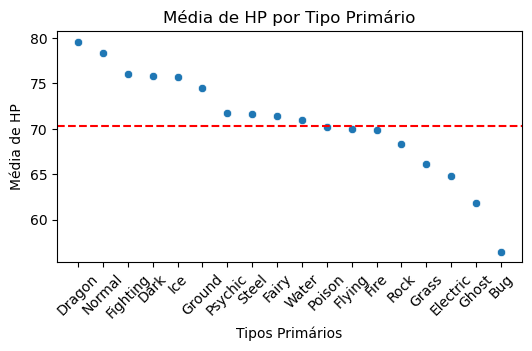

In [43]:
TopTipos(data, 'HP')

##  Ataque / Tipo

Isso mostra que o tipo Lutador é o mais forte fisicamente, e o tipo Psíquico o mais fraco.

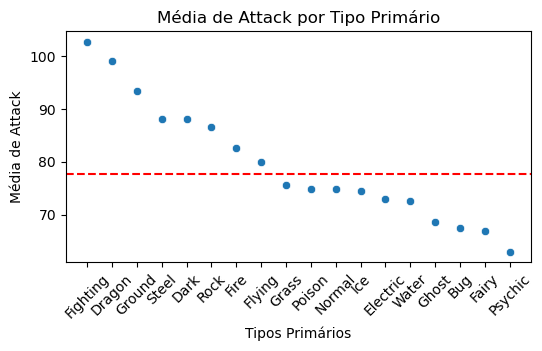

In [44]:
TopTipos(data, 'Attack')

## Defesa / Tipo

Isso mostra que o tipo Metal é o mais resistente a ataques físicos, e o tipo Normal o menos resistente.

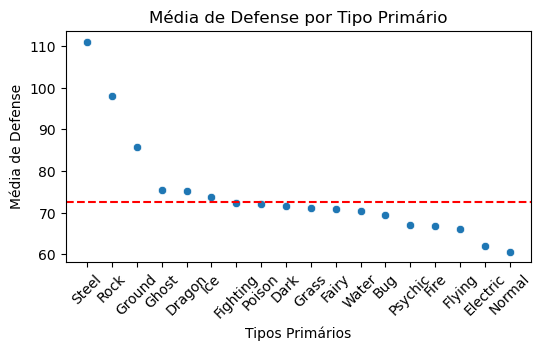

In [45]:
TopTipos(data, 'Defense')

## Ataque Especial / Tipo

Isso mostra que o tipo Psíquico é o mais forte em ataques especiais, e o tipo Terra o mais fraco.

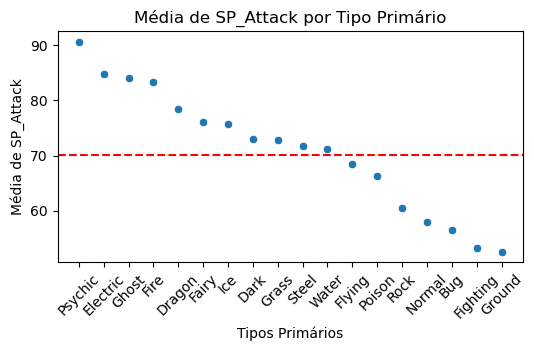

In [46]:
TopTipos(data, 'SP_Attack')

## Defesa Especial / Tipo

Isso mostra que o tipo Fada é o mais resistente a ataques especiais, e o tipo Inseto o menos resistente.

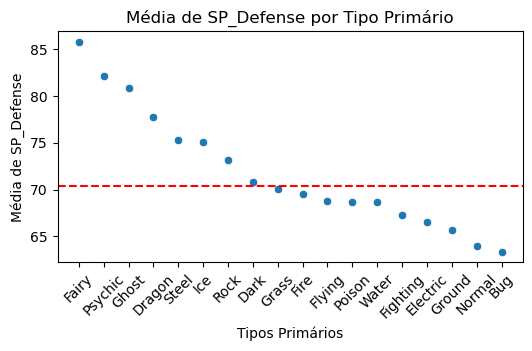

In [47]:
TopTipos(data, 'SP_Defense')

## Velocidade / Tipo

Isso mostra que o tipo Elétrico é o mais rápido e o tipo Pedra o mais lento.

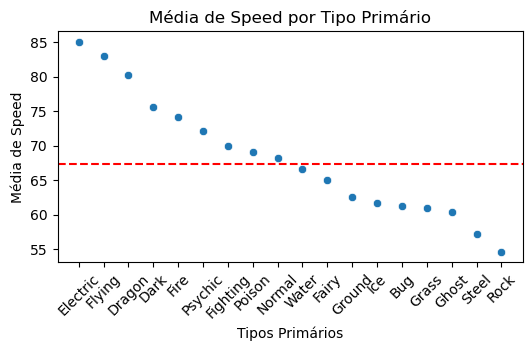

In [48]:
TopTipos(data, 'Speed')

## Z-Score / Tipo

Isso mostra que o tipo Dragão é o tipo mais forte estatisticamente, e o tipo Inseto o mais fraco.

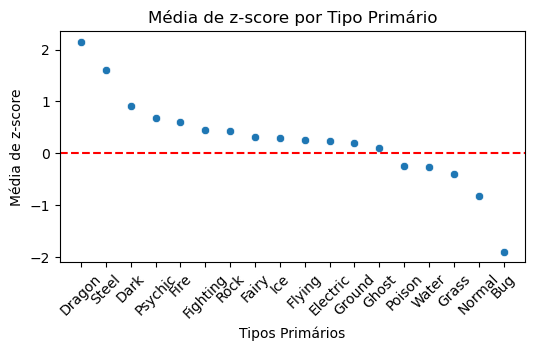

In [49]:
TopTipos(data_zscore, 'z-score')

Antes de prosseguir, vamos definir as cores para cada tipo de pokémon para melhor visualização:

In [50]:
cores = {
    'Normal': '#A8A77A',
    'Fire': '#EE8130',
    'Water': '#6390F0',
    'Grass': '#7AC74C',
    'Electric': '#F7D02C',
    'Ice': '#96D9D6',
    'Fighting': '#C22E28',
    'Poison': '#A33EA1',
    'Ground': '#E2BF65',
    'Flying': '#A98FF3',
    'Psychic': '#F95587',
    'Bug': '#A6B91A',
    'Rock': '#B6A136',
    'Ghost': '#735797',
    'Dragon': '#6F35FC',
    'Dark': '#705746',
    'Steel': '#B7B7CE',
    'Fairy': '#D685AD'
}

# Stats dos Pokémon ao decorrer das gerações

Agora, faremos um gráfico de dispersão baseado no número da Pokedéx do Pokémon e seu z-score. Quanto maior for o número na Pokédex do Pokémon (eixo x), mais recente ele é em termos de geração.

In [51]:
def Linregress(data, eixo_x, eixo_y):
    result = linregress(data[eixo_x], data[eixo_y])
    return result.slope * data[eixo_x] + result.intercept

def DecorrerGen(data, stats, tipagem = 0, tipagem2 = 0):
    
    if tipagem == 0 and tipagem2 == 0:
        plt.figure(figsize =(8, 6))
        sns.scatterplot(data = data, x = 'No', y = stats, hue = 'Type1', palette = cores)

        for tipo, data_tipo in data.groupby('Type1'):
            linha_regressao = Linregress(data_tipo, 'No', stats)
            plt.plot(data_tipo['No'], linha_regressao, color=cores.get(tipo), label=tipo)
        
        return
    
    if tipagem != 0 and tipagem2 == 0:
        data_especifico = data.loc[data['Type1'] == tipagem]

        plt.figure(figsize =(8, 6))
        sns.scatterplot(data = data_especifico, x = 'No', y = stats, hue = 'Type1', palette = cores)

        linha_regressao = Linregress(data_especifico, 'No', stats)
        plt.plot(data_especifico['No'], linha_regressao, color=cores.get(tipagem))
        
        return
        
    if tipagem != 0 and tipagem2 != 0:
        data_especifico = data.loc[(data['Type1'] == tipagem) | (data['Type1'] == tipagem2)]
        
        plt.figure(figsize =(8, 6))
        sns.scatterplot(data = data_especifico, x = 'No', y = stats, hue = 'Type1', palette = cores)

        for tipo, data_tipo in data_especifico.groupby('Type1'):
            linha_regressao = Linregress(data_tipo, 'No', stats)
            plt.plot(data_tipo['No'], linha_regressao, color=cores.get(tipo), label=tipo)

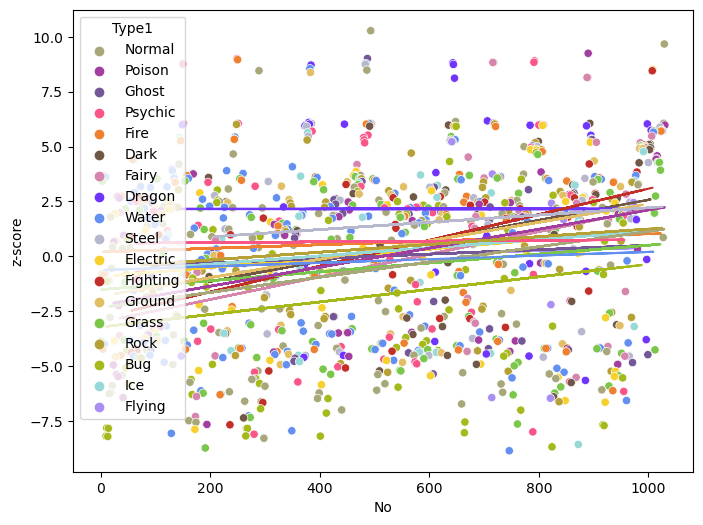

In [52]:
DecorrerGen(data_zscore, 'z-score')

Mesmo com esse gráfico bem bagunçado, podemos concluir que os desenvolvedores dos jogos de Pokémon mantém a média dos stats dos Pokémon relativamente constantes ao decorrer dos jogos.

Porém, há alguns que possuem mudanças, como:

## Lutador ao decorrer das gerações

É notório no gráfico que o tipo lutador possui uma evolução de poder ao decorrer das gerações

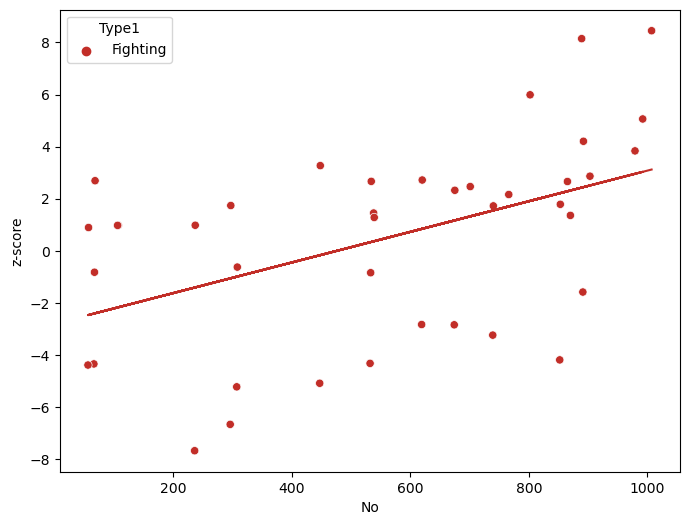

In [53]:
DecorrerGen(data_zscore, 'z-score', 'Fighting')

## Dragão ao decorrer das gerações

Em contraponto, o tipo dragão se manteve bem constante ao decorrer das gerações.

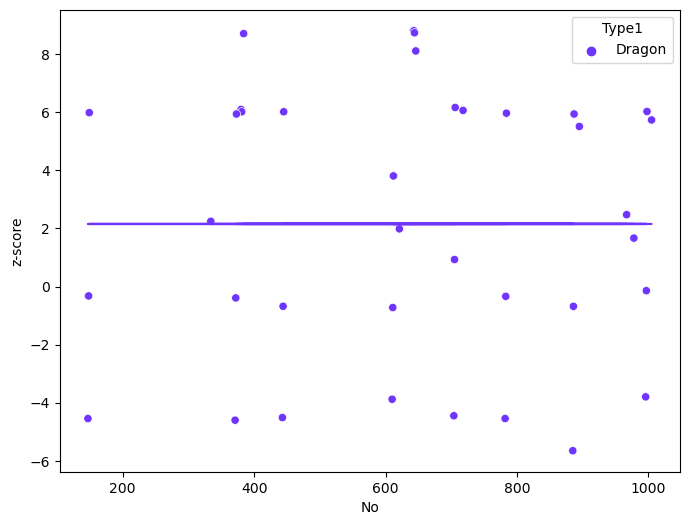

In [54]:
DecorrerGen(data_zscore, 'z-score', 'Dragon')

Apesar do tipo dragão ser o tipo mais forte como visto anteriormente, nas gerações mais atuais, o tipo lutador está mais poderoso.

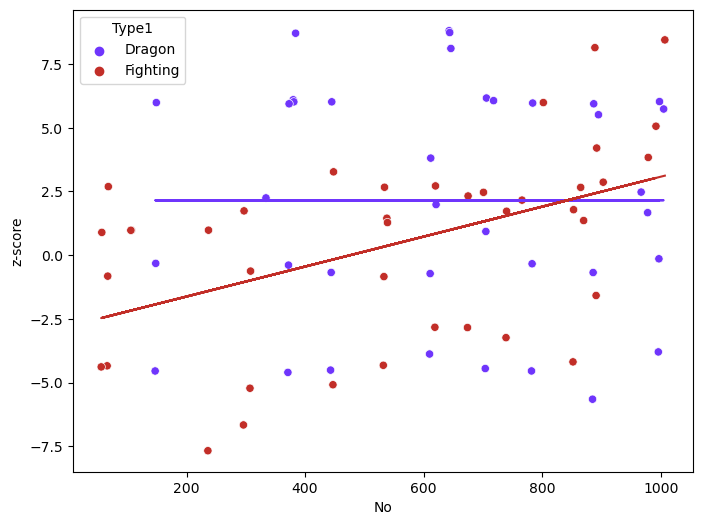

In [55]:
DecorrerGen(data_zscore, 'z-score', 'Fighting', 'Dragon')

Agora vamos testar em cada estatística e comparar o seu representante de maior média com o de segunda maior média, conforme apresentado anteriormente.

## Para HP:

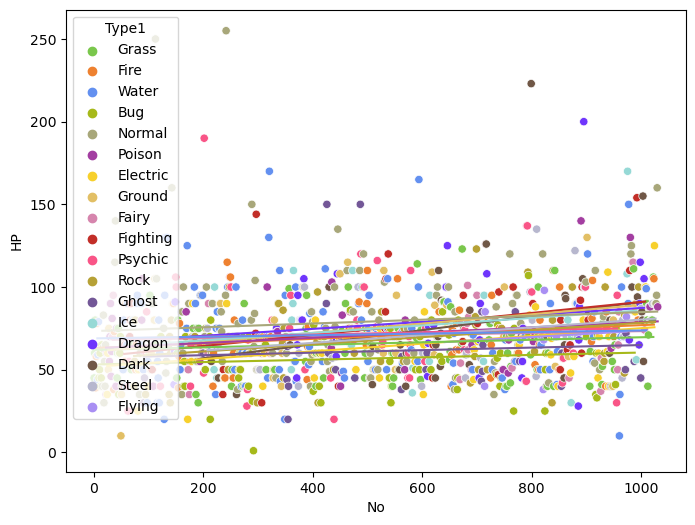

In [56]:
DecorrerGen(data, 'HP')

Maior média: Dragão

Segundo Lugar: Normal

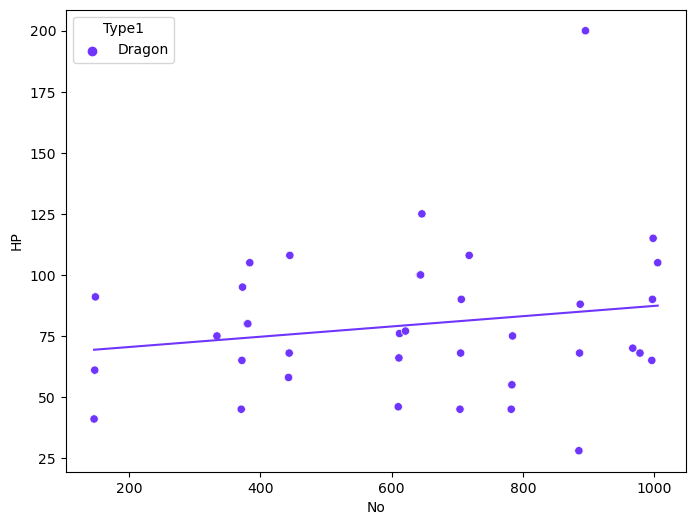

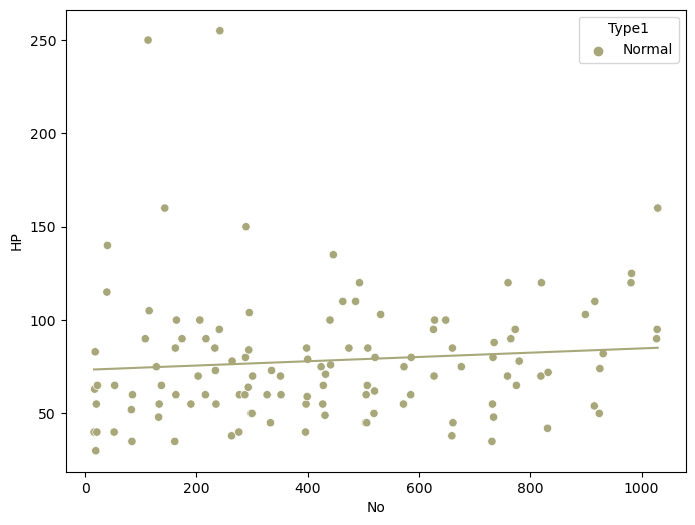

In [57]:
DecorrerGen(data, 'HP', 'Dragon')
DecorrerGen(data, 'HP', 'Normal')

Aqui vemos que o tipo Normal esteve superior ao tipo Dragão em quesito de HP nas primeiras gerações, mas foi ultrapassado aos poucos.

Uma possível explicação para o fato de os Pokémon do tipo Dragão apresentarem uma média de HP maior, apesar de os do tipo Normal terem uma quantidade maior de Pokémon com uma quantidade superior de HP, é o fato de o tipo Normal apresentar uma quantidade imensa de Pokémon fraco em quesito de HP.

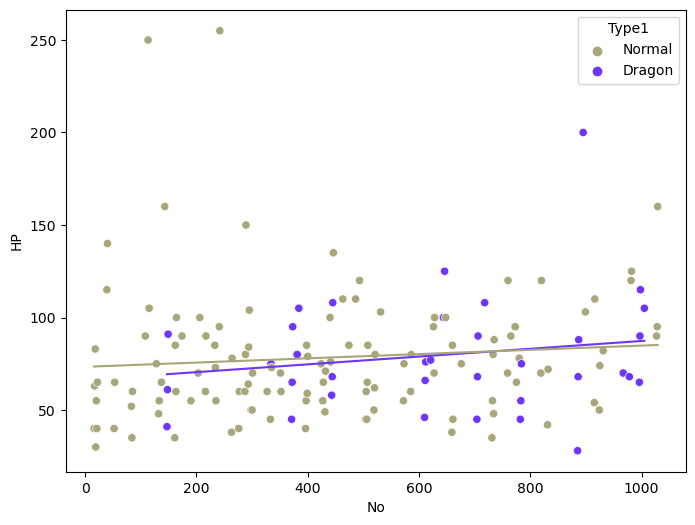

In [58]:
DecorrerGen(data, 'HP', 'Dragon', 'Normal')

## Para Ataque:

Maior média: Lutador

Segundo Lugar: Dragão

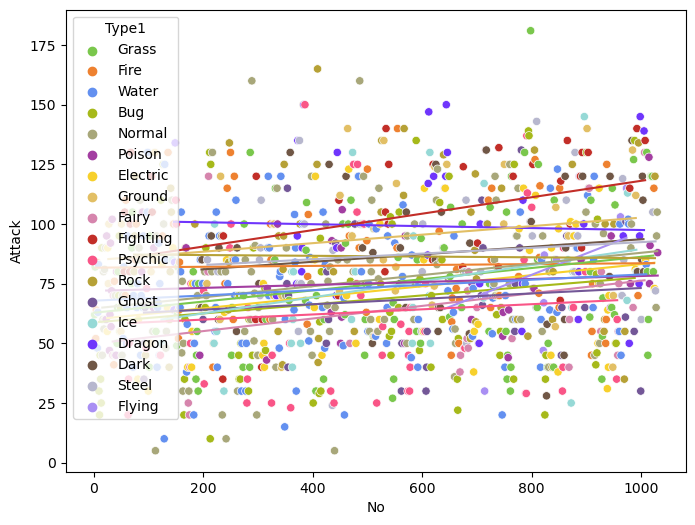

In [59]:
DecorrerGen(data, 'Attack')

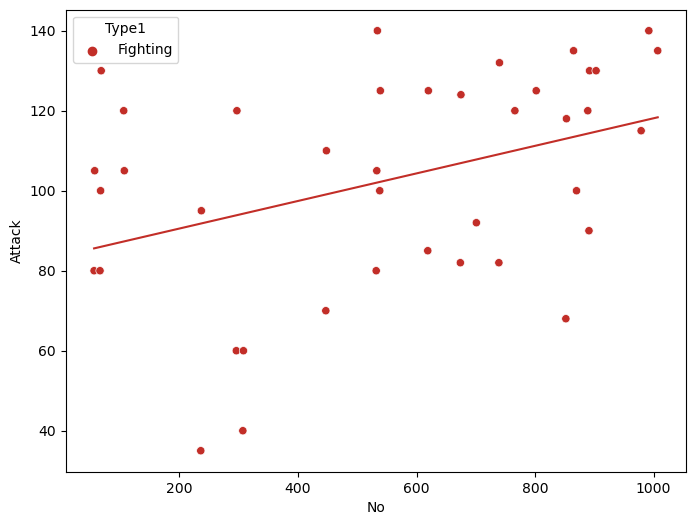

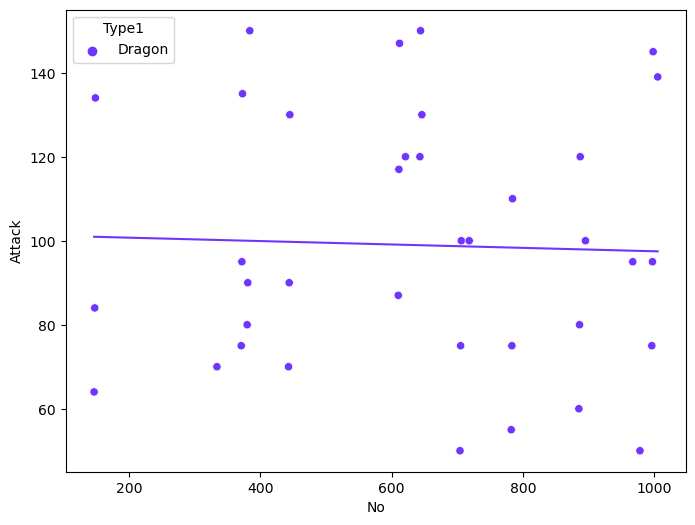

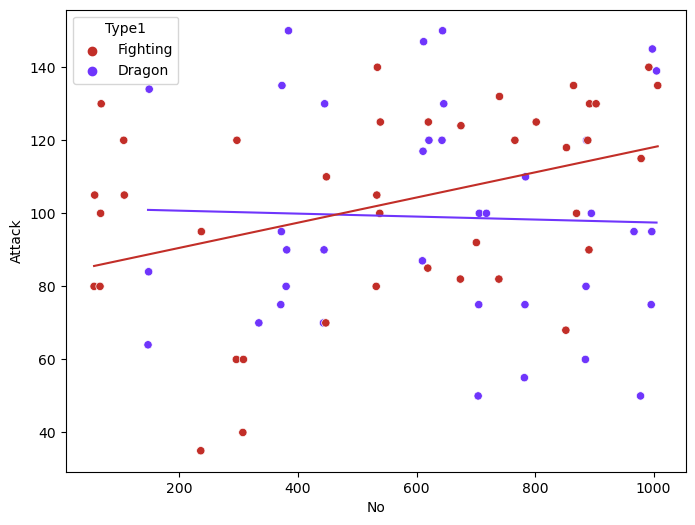

In [60]:
DecorrerGen(data, 'Attack', 'Fighting')
DecorrerGen(data, 'Attack', 'Dragon')
DecorrerGen(data, 'Attack', 'Fighting','Dragon')

Aqui, percebe-se que o tipo Dragão era superior nas primeiras gerações, até que o tipo Lutador sofreu um BOOM e superou por muito a força do segundo colocado até as gerações atuais.

## Para Defesa:

Maior média: Metal

Segundo Lugar: Pedra

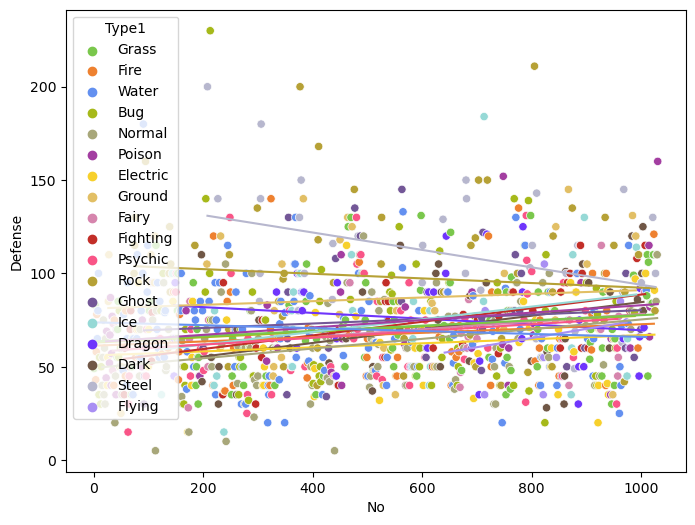

In [61]:
DecorrerGen(data, 'Defense')

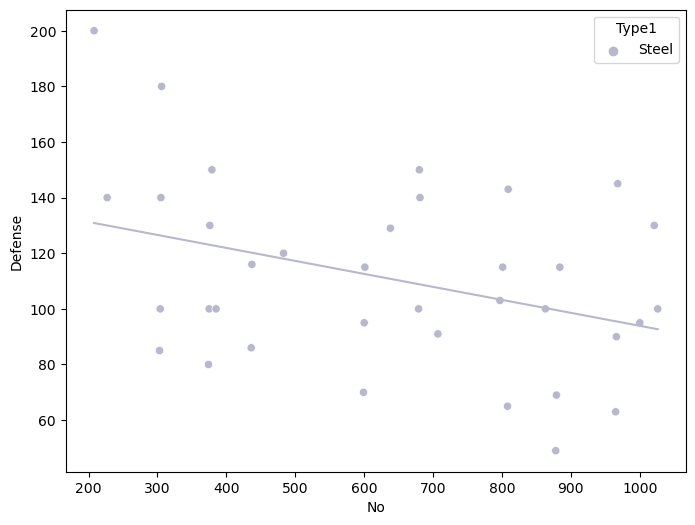

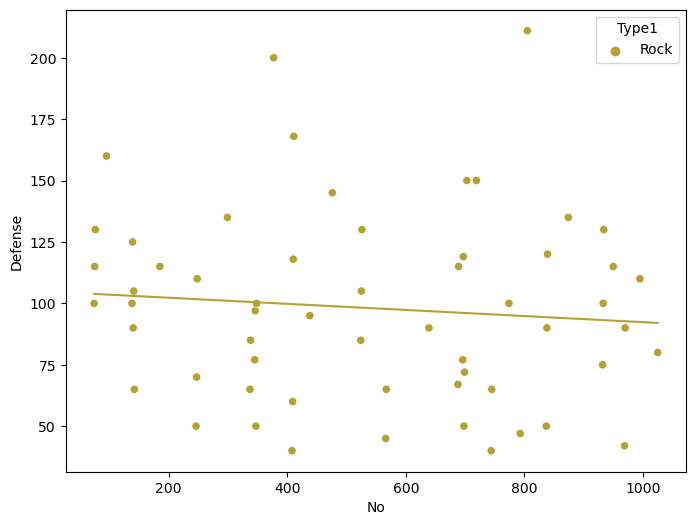

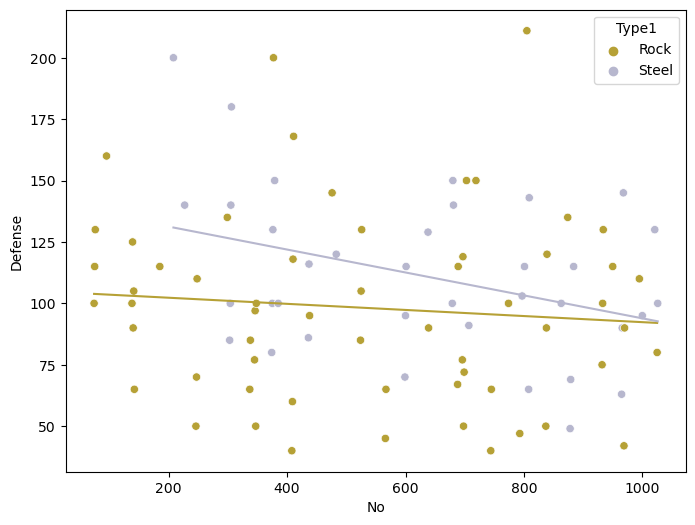

In [62]:
DecorrerGen(data, 'Defense', 'Steel')
DecorrerGen(data, 'Defense', 'Rock')
DecorrerGen(data, 'Defense', 'Steel', 'Rock')

O tipo Metal se manteve superior dentre todas as gerações, apesar de seu grande declínio, quase encostando no tipo Pedra na geração mais atual.

Se o tipo Metal continuar nesse declínio, talvez seja superado em jogos futuros.

## Para Ataque Especial:

Maior Média: Psíquico

Segundo Lugar: Elétrico

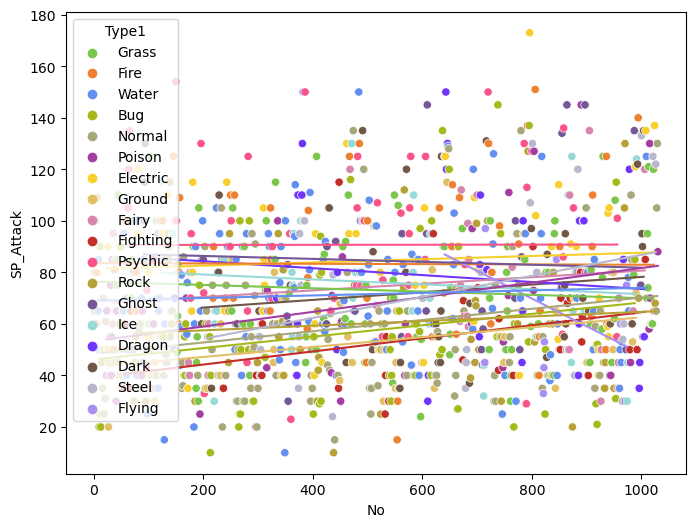

In [63]:
DecorrerGen(data, 'SP_Attack')

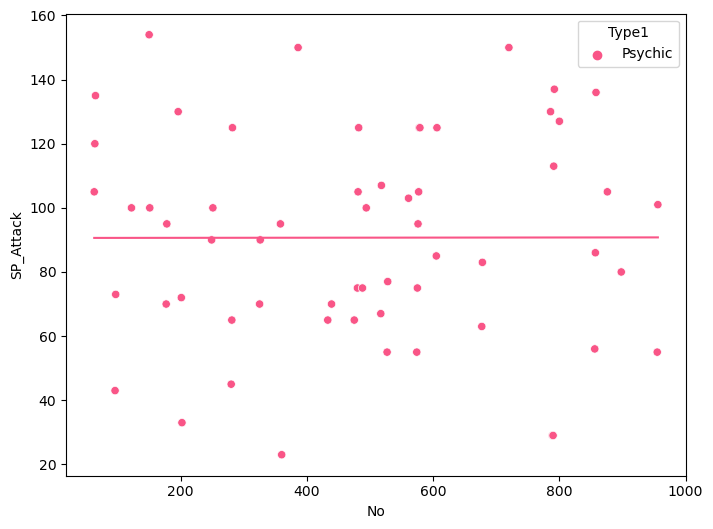

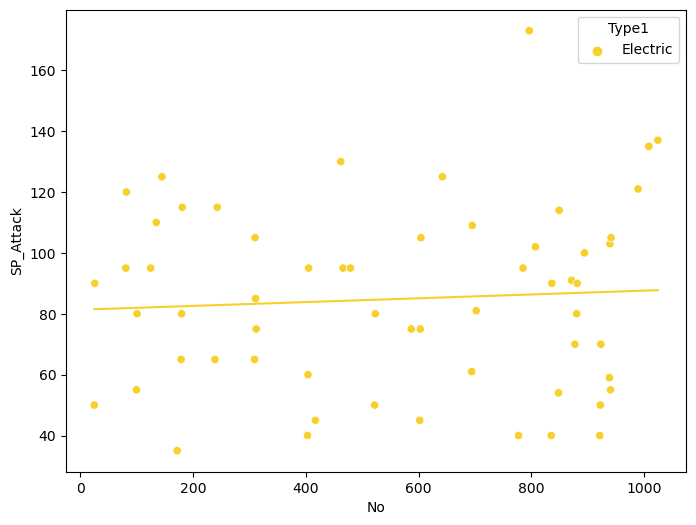

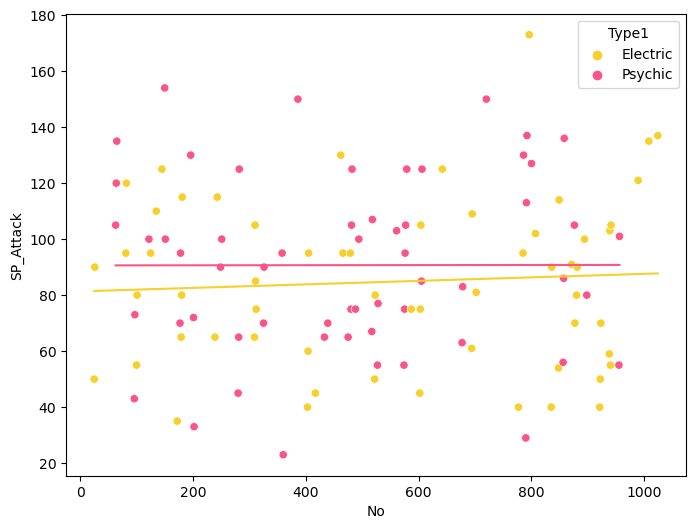

In [64]:
DecorrerGen(data, 'SP_Attack', 'Psychic')
DecorrerGen(data, 'SP_Attack', 'Electric')
DecorrerGen(data, 'SP_Attack', 'Psychic', 'Electric')

Para ataque especial, o primeiro colocado, Psíquico, se manteve em primeiro ao decorrer de todas as gerações, porém, apresenta uma queda muito leve, ao contrário do tipo Elétrico, que possui um crescimento também leve. Talvez mais uns dois ou três jogos para que o tipo Elétrico ultrapasse?

## Para Defesa Especial:

Maior média: Fada

Segundo Lugar: Psíquico

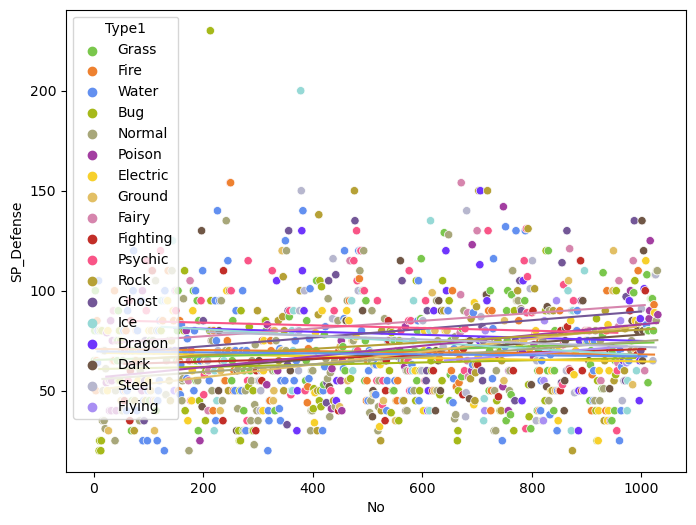

In [65]:
DecorrerGen(data, 'SP_Defense')

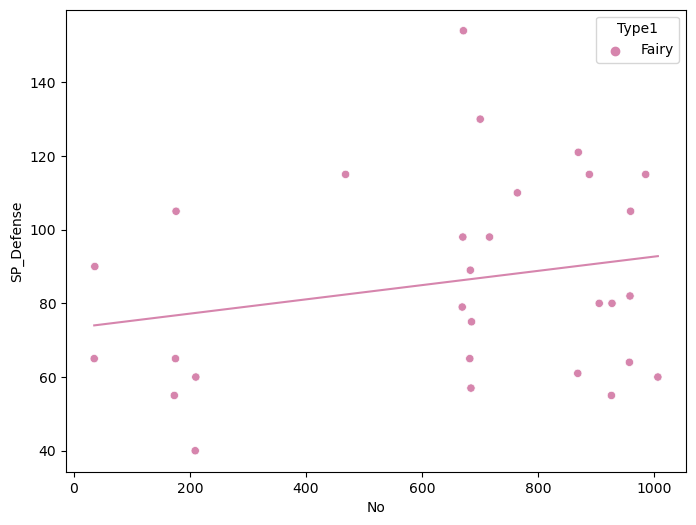

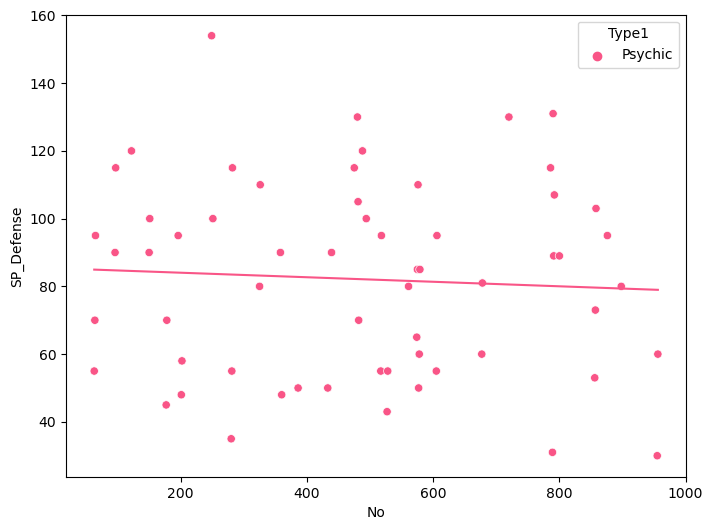

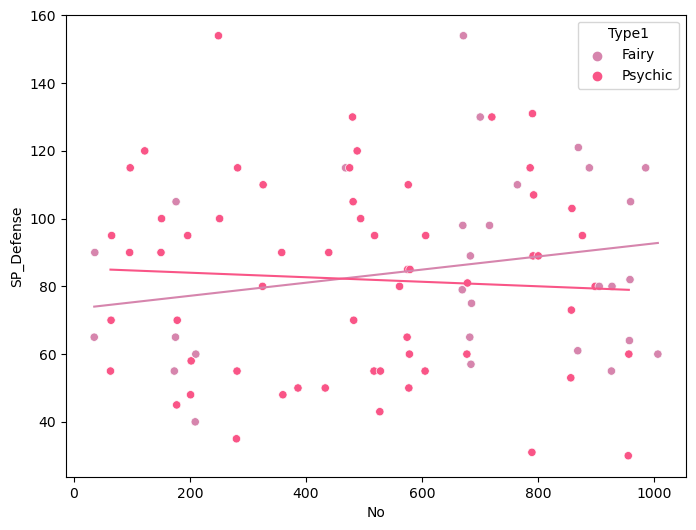

In [66]:
DecorrerGen(data, 'SP_Defense', 'Fairy')
DecorrerGen(data, 'SP_Defense', 'Psychic')
DecorrerGen(data, 'SP_Defense', 'Fairy', 'Psychic')

Assim como o tipo Lutador no ataque superou o Dragão, o Tipo Fada superou o Psíquico em defesa especial

## Para Velocidade:

Maior Média: Elétrico

Segundo Lugar: Voador

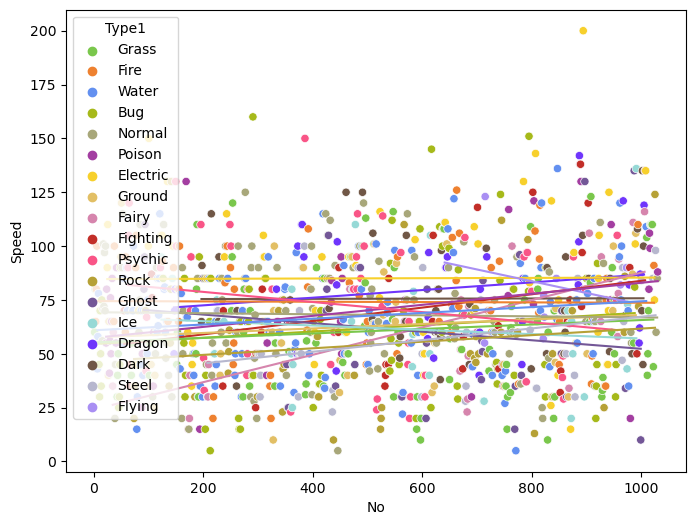

In [67]:
DecorrerGen(data, 'Speed')

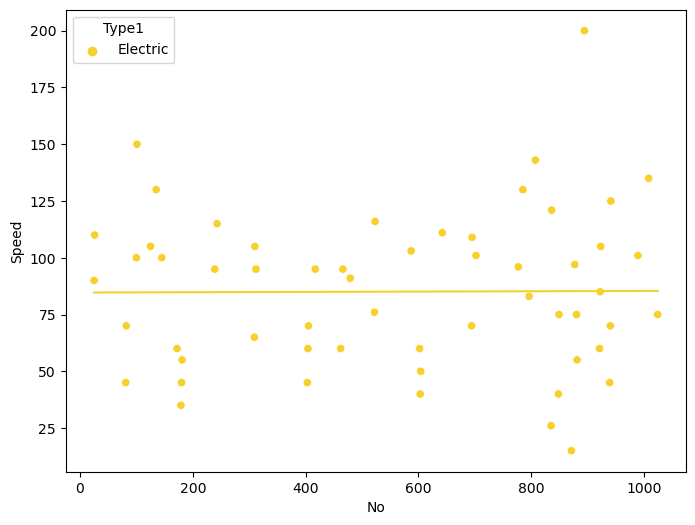

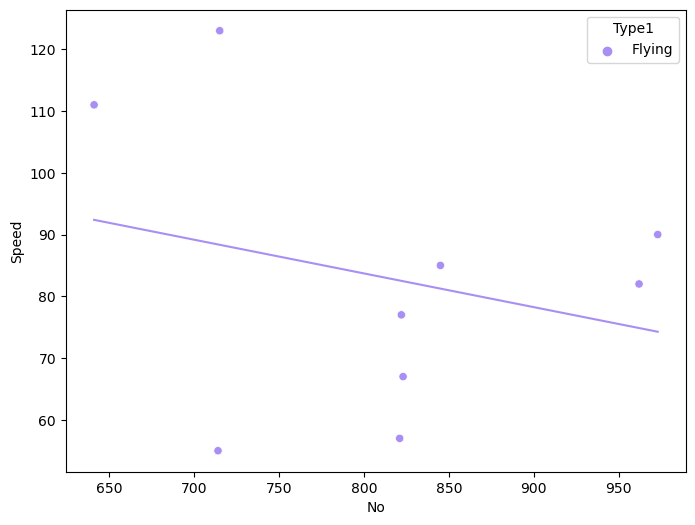

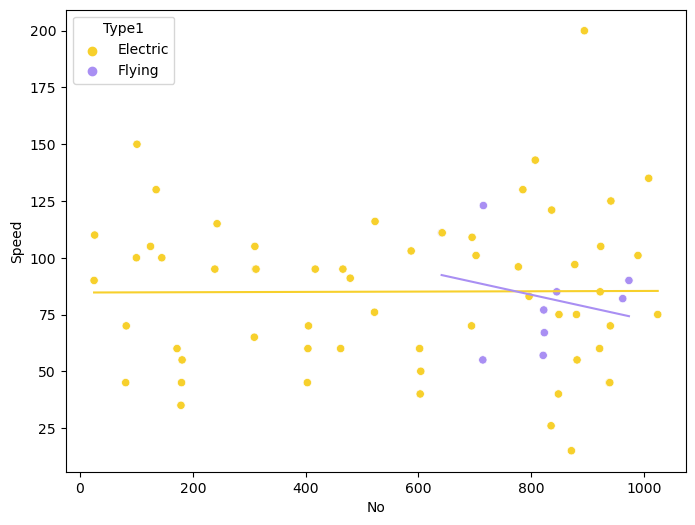

In [68]:
DecorrerGen(data, 'Speed', 'Electric')
DecorrerGen(data, 'Speed', 'Flying')
DecorrerGen(data, 'Speed', 'Electric', 'Flying')

Aqui temos um caso interessante, por que o tipo Voador só possui gráfico a partir do número 600?

Pois em gerações passadas, o tipo Voador não existia como tipo primário, apenas secundário, como visto no Pokémon ave 'Pidgey', ao qual é Normal e Voador, 'Altaria', Dragão e Voador, 'Charizard', Fogo e Voador.

O primeiro Pokémon implementado com o tipo primário Voador chegou apenas na quinta geração, obtendo apenas nove representantes entre todas as gerações de Pokémon.

In [69]:
data_voadores = data[['No', 'Name', 'Type1','Gen']]
data_voadores = data_voadores.loc[data_voadores['Type1'] == 'Flying']
data_voadores.sort_values(by='Gen')

,No,Name,Type1,Gen
774,641,Tornadus Incarnate Form,Flying,5
866,714,Noibat,Flying,6
867,715,Noivern,Flying,6
994,821,Rookidee,Flying,8
995,822,Corvisquire,Flying,8
996,823,Corviknight,Flying,8
1018,845,Cramorant,Flying,8
1152,962,Bombirdier,Flying,9
1164,973,Flamigo,Flying,9


# KMeans

Para verificarmos se há a formação de algum grupo específico dentro dos gráficos de dispersão criados, vamos verificar os gráficos das estatísticas mais correlacionadas.

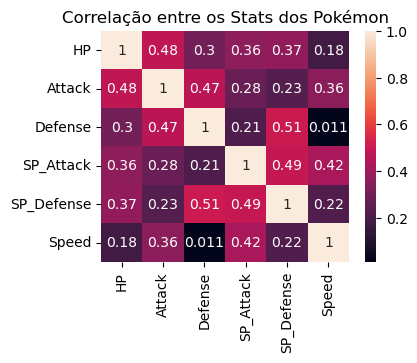

In [70]:
data_stats = data[['HP', 'Attack', 'Defense', 'SP_Attack', 'SP_Defense', 'Speed']]
data_corr = data_stats.corr()
plt.figure(figsize=(4, 3))
sns.heatmap(data_corr, annot=True)
plt.title('Correlação entre os Stats dos Pokémon')
plt.show()

Com isso, podemos dizer que: 

                             HP possui mais correlação com Ataque

                         Defesa possui mais correlação com Defesa Especial
                         
                     Velocidade possui mais correlação com Ataque Especial

## HP e Ataque:

<Axes: xlabel='Attack', ylabel='HP'>

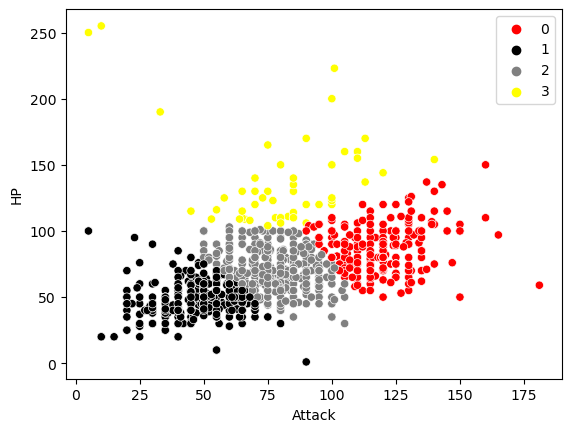

In [71]:
colors = ['red', 'black', 'gray', 'yellow']

data_atk_HP = data_stats[['Attack', 'HP']]

kmeans = KMeans(n_clusters=4, n_init=10)

kmeans.fit(data_atk_HP)

sns.scatterplot(data=data_atk_HP, x='Attack', y='HP', hue=kmeans.labels_, palette = colors)

Esses grupos podem indicar a Altura do Pokémon. O grupo 1 por possuírem pouco HP e pouco Ataque, talvez seja considerado um Pokémon pequeno e frágil. O grupo 0 pode indicar os medianos. O grupo 2 os Pokémon altos, com maior quantidade de HP e de Ataque. O grupo 3 deve indicar os outliers, que estão fora do padrão apresentado, como Pokémon pequenos porém com muito HP.

O outlier mais óbvio que pode ser considerado é a Blissey, Pokémon médio, com pouca força, porém muito HP, sendo um dos dois pontos mais acima do gráfico.

## Defesa e Defesa Especial

<Axes: xlabel='Defense', ylabel='SP_Defense'>

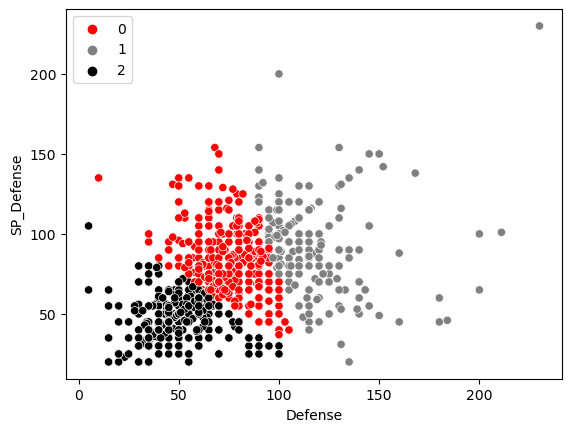

In [72]:
colors = ['red', 'gray', 'black']

data_defs = data[['Defense', 'SP_Defense']]

kmeans = KMeans(n_clusters=3, n_init=10)

kmeans.fit(data_defs)

sns.scatterplot(data=data_defs, x='Defense', y='SP_Defense', hue=kmeans.labels_, palette = colors)

O que esses grupos poderia indicar seria a capacidade defensiva de um Pokémon. O grupo 0 seria os que não possuem capacidade de se defenderem, com maior ataque ou velocidade por falta de um equipamento de defesa. O grupo 2 já indicaria um Pokémon com poucas formas de se defender. O grupo 1 indica os Pokémon com armaduras, escudos, peles duras, escamas, provavelmente, grande parte sendo do tipo Metal, Pedra e Dragão. Também poderia indicar o peso do Pokémon, pela armadura ou escudos influenciarem em seu peso.

## Velocidade e Ataque Especial

<Axes: xlabel='Speed', ylabel='SP_Attack'>

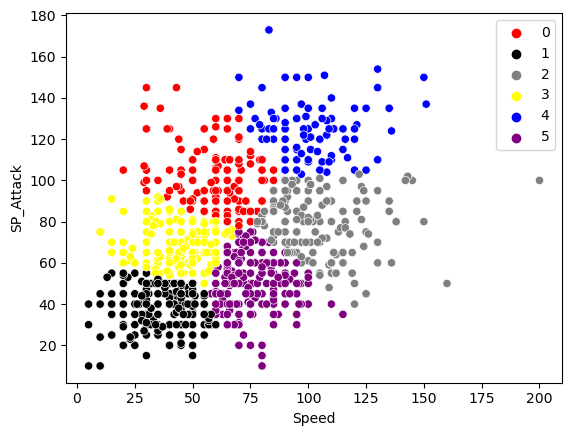

In [73]:
colors = ['red', 'black', 'gray', 'yellow', 'blue', 'purple']

data_speeatk = data[['Speed', 'SP_Attack']]

kmeans = KMeans(n_clusters =  6, n_init=10)

kmeans.fit(data_speeatk)

sns.scatterplot(data=data_speeatk, x='Speed', y='SP_Attack', hue=kmeans.labels_, palette=colors)

Esses grupos podem indicar diferentes combinações de características. O grupo 0 pode fazer referência aos Pokémon não tão pesados, mas fracos em Ataque Especial, como os Pokémon do tipo Veneno grupo 1, indica os Pokémon mais rápidos e fortes em Ataque Especial, como os Pokémon do tipo Elétrico, Psíquico ou Fogo. O grupo 2 pode indicar os Pokémon não evoluídos ou que são focados em Defesa e Vida, como os Pokémon do tipo Normal. O grupo 3 indica os Pokémon com menor Velocidade porém muito Ataque Especial, como os Pokémon do tipo Água, em especial o Kyogre. Já o grupo 5 indica os Pókemon medianos em Ataque Especial porém bastante velozes, como os Pokémon do tipo Lutador.

Em resumo, nada interessante foi encontrado nesses grupos.

O padrão provável encontrado é a possível referência à Altura e ao Peso de acordo com as estatísticas dos Pokémon. Entretanto,  não podemos levar em conta  essas suposições, apenas prever uma possível causa para sua altura e seu peso baseado em seus stats.